In [1]:
import random
import string

import japanize_matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import networkx as nx
from pyvis.network import Network


#### リファクタリング後

In [2]:
random.seed(42)
NODE_NUM = 60

# 色の設定
colors = [
    '#96D33F', '#36BB6E', '#75CAE1', '#5193FF', '#FDB000',# 三井化学
    '#F0ABA1', '#F7DDEC', '#D0E6A1', '#AEC8DE', '#D1CFE3', '#B9DFD8', '#FEFDCF', # 共起ネットワークで検索していい感じの色
          ]

# ノードの作成
nodes_label = [f'node_{s}' for s in list(range(NODE_NUM))]
nodes_color = [random.choice(colors) for _ in range(NODE_NUM)]
nodes_size = [np.random.standard_exponential()*10 for _ in range(NODE_NUM)]
nodes_info = [''.join(random.choices(string.ascii_letters + string.digits, k=10)) for _ in range(NODE_NUM)]
nodes_shape = [random.choice(['ellipse'	,'circle'	,'database'	,'box'	,'text'	,'diamond', 'dot', 'star', 'triangle', 'triangleDown', 'hexagon', 'square']) for _ in range(NODE_NUM)]
df_nodes = pd.DataFrame([nodes_label,nodes_color,nodes_size,nodes_info,nodes_shape]).T
df_nodes.columns = ['nodes_label','nodes_color','nodes_size','nodes_info','nodes_shape']
df_nodes = df_nodes.reset_index().rename(columns={'index':'nodes_id'})
display(df_nodes.head())

# エッジの作成
df_edges = pd.DataFrame([random.sample(list(df_nodes['nodes_label'].index), 2) for _ in range(int(NODE_NUM))],
                        columns=['nodes_id_from','nodes_id_to'])
df_edges = df_edges[['nodes_id_from','nodes_id_to']].value_counts().reset_index()
df_edges = df_edges.rename(columns={0:'edges_size'})
df_edges['edges_size'] = [np.random.standard_exponential()*10 for _ in range(len(df_edges))]

df_edges['edges_label'] = df_edges['nodes_id_from'].astype('str')+'_'+df_edges['nodes_id_to'].astype('str')
df_edges['edges_color'] = [random.choice(colors) for _ in range(len(df_edges))]
df_edges['edges_info'] = [''.join(random.choices(string.ascii_letters + string.digits, k=10)) for _ in range(len(df_edges))]
df_edges['edges_dash'] = [random.choice([True,False]) for _ in range(len(df_edges))]
display(df_edges.head())

# グラフの作成（有向グラフ）
G = nx.DiGraph()

# ノードの追加
for index, row in df_nodes.iterrows():
  G.add_node(
    row['nodes_id'], 
    label=row['nodes_label'], 
    color=row['nodes_color'],
    size=row['nodes_size'],
    title=row['nodes_info'],
    shape=row['nodes_shape'],
    )
  
# エッジの追加（ランダムにエッジを作成）
for index, row in df_edges.iterrows():
  G.add_edge(    
    row['nodes_id_from'],    
    row['nodes_id_to'],
    label=row['edges_label'],
    # width=row['edges_size'],
    value=row['edges_size'],
    color=row['edges_color'],
    title=row['edges_info'],
    dashes=row['edges_dash'],
    arrowStrikethrough=False,
    # physics=False,
    # smooth=False,
    )


,nodes_id,nodes_label,nodes_color,nodes_size,nodes_info,nodes_shape
0,0,node_0,#B9DFD8,5.669641,sM2wleOV91,diamond
1,1,node_1,#36BB6E,7.305636,1xCZkwPRQe,database
2,2,node_2,#96D33F,13.135075,NHpCq5QnuV,text
3,3,node_3,#FEFDCF,13.120937,dYXye4JSnE,ellipse
4,4,node_4,#FDB000,14.077662,2NiiUHUAKw,square


,nodes_id_from,nodes_id_to,edges_size,edges_label,edges_color,edges_info,edges_dash
0,2,14,10.302953,2_14,#F0ABA1,6Oj5sRzDDC,True
1,2,56,7.080032,2_56,#F0ABA1,ilLUieV0vW,True
2,29,44,0.281507,29_44,#B9DFD8,qaTZJO1BEu,False
3,30,18,8.248133,30_18,#36BB6E,Vx518ox1zt,True
4,30,33,4.461300,30_33,#75CAE1,D4x9XOj7h7,False


In [3]:
nt = Network(
    height="1000px",
    width="1000px",
    directed=True,
    notebook=True,
    neighborhood_highlight=True, select_menu=True, filter_menu=True,
    cdn_resources='remote',
    )

nt.from_nx(G)

nt.force_atlas_2based()
nt.toggle_physics(True)

nt.show_buttons()
# nt.set_options("""
# var options = {
#   "nodes": {
#     "font": {
#       "size": 14
#     }
#   },
#   "edges": {
#     "arrows": {
#       "to": {"scaleFactor": 0.35}
#     },
#     "font": {
#       "size": 8
#     },
#     "smooth": {
#       "enabled": false
#     },
#     "arrowStrikethrough": false
#   }
# }
# """)

nt.show('network_after.html',notebook=False)

network_after.html


In [4]:
#### リファクタリング前

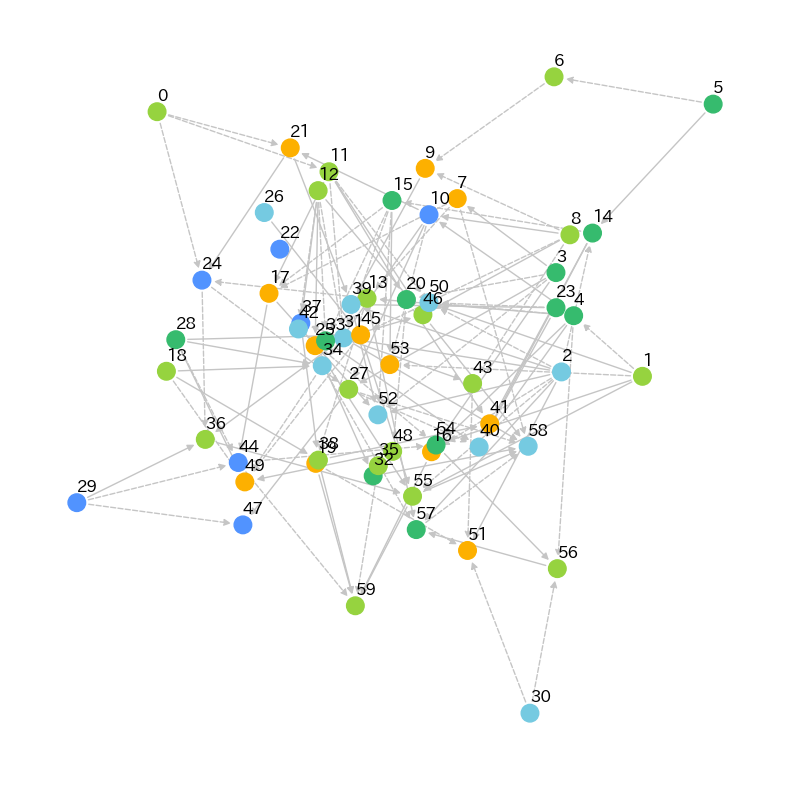

In [5]:
random.seed(42)
NODE_NUM = 60
EDGE_RATIO = 0.075

plt.figure(figsize=(8, 8))

# グラフの作成（有向グラフ）
G = nx.DiGraph()

# 色の設定
colors = [
    '#96D33F', '#36BB6E', '#75CAE1', '#5193FF', '#FDB000',# 三井化学
    # '#F0ABA1', '#F7DDEC', '#D0E6A1', '#AEC8DE', '#D1CFE3', '#B9DFD8', '#FEFDCF', # 共起ネットワークで検索していい感じの色
          ]
color_map = [random.choice(colors) for _ in range(NODE_NUM)]

# ノードの追加
nodes = list(range(NODE_NUM))
for i in nodes:
  G.add_node(i, label=f"node{i}", color=color_map[i])

# エッジの追加（ランダムにエッジを作成）
for i in range(0, NODE_NUM):
  for j in range(i+1, NODE_NUM):
    if random.random() < EDGE_RATIO:
      if random.random() < 0.5:
        G.add_edge(i, j, label=f"{i}->{j}", color='black', style='solid',)
      else:
        G.add_edge(i, j, label=f"{i}->{j}", color='black', style='dashed',)

# レイアウト
pos = nx.kamada_kawai_layout(G)

# ノード
node_colors = nx.get_node_attributes(G, 'color').values()
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=160)

# ノードラベル
# nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
for c in pos:
  plt.text(pos[c][0], pos[c][1] + 0.03, c, fontsize=12)

# エッジのスタイルと太さの設定
edges = G.edges()
solid_edges = [(u, v) for u, v, d in G.edges(data=True) if 'style' in d and d['style']=='solid']
dashed_edges = [(u, v) for u, v, d in G.edges(data=True) if 'style' in d and d['style']=='dashed']

nx.draw_networkx_edges(G, pos, edgelist=solid_edges, edge_color='#C5C5C5', style='solid', arrowstyle='-|>', arrowsize=10)
nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, edge_color='#C5C5C5', style='dashed', arrowstyle='-|>', arrowsize=10)

# エッジラベル
# edge_labels = nx.get_edge_attributes(G, 'label')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='black')

plt.axis("off")
plt.tight_layout()
plt.show()

In [6]:
nt = Network(
    height="1000px",
    width="1000px",
    directed=True,
    notebook=True,
    neighborhood_highlight=True, select_menu=True, filter_menu=True,
    cdn_resources='remote',
    )

nt.from_nx(G)

nt.force_atlas_2based()
nt.toggle_physics(True)

# nt.show_buttons()
nt.set_options("""
var options = {
  "nodes": {
    "font": {
      "size": 14
    }
  },
  "edges": {
    "arrows": {
      "to": {"scaleFactor": 0.35}
    },
    "font": {
      "size": 8
    },
    "smooth": {
      "enabled": false
    },
    "arrowStrikethrough": false
  }
}
""")


nt.show('network_before.html',notebook=False)

network_before.html
